<a href="https://colab.research.google.com/github/VitorCabrall/Machine-and-Deep-Learning/blob/main/Keras_Classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


## Importando Dados

In [ ]:
dataset = keras.datasets.fashion_mnist
((x_train,y_train),(x_test,y_test))=dataset.load_data()


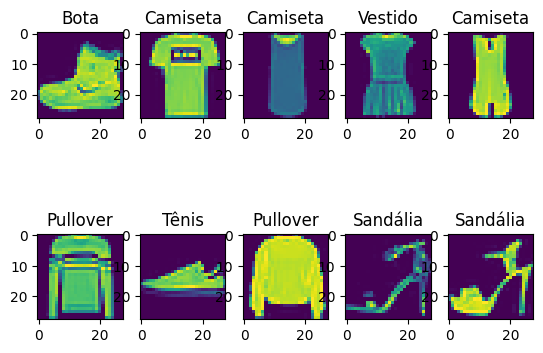

In [ ]:
# Plotagem

nomes = ['Camiseta','Calça','Pullover','Vestido','Casaco',
         'Sandália','Camisa','Tênis','Bolsa','Bota']
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(x_train[imagem])
  plt.title(nomes[y_train[imagem]])

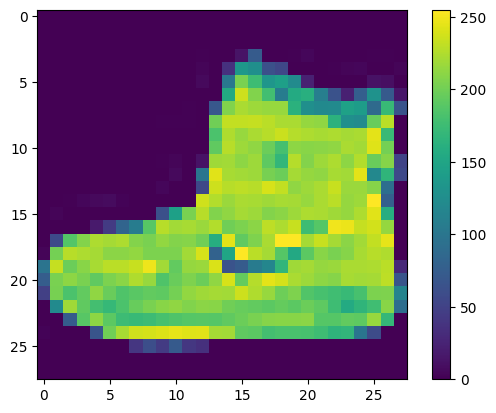

In [ ]:
#Idenfificando o range de cores
plt.imshow(x_train[0])
plt.colorbar()

## Criando Modelo

In [ ]:
#Normalizando os dados
#Como a imagem tem uma variação de cor de 255 possivibilidades, vamos dividir o valor para virar um flot de 0 a 1.
x_train = x_train / float(255)

In [ ]:
modelo = keras.Sequential(
    [
    #Entrada
    keras.layers.Flatten(input_shape = (28,28)), # Camada inicial de entrada, que achata a imagem de (28 x 28) para uma com (1 X 784)

    #Processamento
    keras.layers.Dense(256,activation = tensorflow.nn.relu),  # Criando 256 nós que conectam os dados anteriores. A ativação relu é uma função do keras para ativar a conecção entre os nós de forma a criar linhas não lineares
    keras.layers.Dropout(0.2), # Diminui o overfitting ao desabilitar alguns nós durante o treino, recomenda-se 0.2
    
    keras.layers.Dense(128,activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
     
    keras.layers.Dense(64,activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
     
    #Saída
    keras.layers.Dense(10,activation = tensorflow.nn.softmax) # Criando uma camada de saida com 10 opções, e usando o softmax para calcular a probabilidade de cada uma 
    ]
)

#Compilando modelo
modelo.compile(optimizer = 'adam',
               
               loss = 'sparse_categorical_crossentropy',
               metrics = ["accuracy"])

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'), # Para o modelo quando o valor não estiver melhorando
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]
#Treinando modelo
histórico = modelo.fit(x_train,y_train ,
                       epochs = 6,
                       validation_split = 0.2,
                       #batch_size = 150, # Quantidade de itens avaliadas por treino
                       callbacks=parando_cedo
                       )

Epoch 1/6
1500/1500 [==============================] - 12s 7ms/step - loss: 0.6140 - accuracy: 0.7801 - val_loss: 0.4247 - val_accuracy: 0.8492
Epoch 2/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4448 - accuracy: 0.8434 - val_loss: 0.3675 - val_accuracy: 0.8658
Epoch 3/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4042 - accuracy: 0.8541 - val_loss: 0.3576 - val_accuracy: 0.8690
Epoch 4/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3789 - accuracy: 0.8634 - val_loss: 0.3501 - val_accuracy: 0.8746
Epoch 5/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3612 - accuracy: 0.8693 - val_loss: 0.3430 - val_accuracy: 0.8708
Epoch 6/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3508 - accuracy: 0.8727 - val_loss: 0.3472 - val_accuracy: 0.8734


In [ ]:
#Sumário do Modelo
sumário_modelo = modelo.summary()
sumário_modelo

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)               

In [ ]:
#Pesos da Camada Dense 01
pesos_dense = modelo.layers[1].get_weights()

## Salvando Modelo

In [ ]:
from tensorflow.keras.models import load_model

modelo.save("Classificacao_roupas.h5")
modelo_salvo = load_model("Classificacao_roupas.h5")

## Prevendo resultados

In [ ]:
predicoes = modelo.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#A predição retorna um array com as probabilidades de cada rótulo
predicoes[0] 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

Rótulo previsto: Casaco
Rótulo Real: Casaco


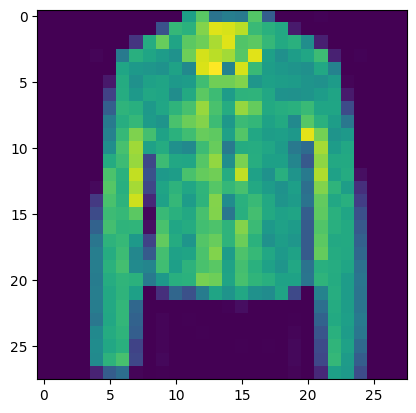

In [ ]:
item = 10
print("Rótulo previsto: {}".format(nomes[np.argmax(predicoes[item])])) # A funçaõ argmax do numpy retorna a posição que contem o maior valor
print("Rótulo Real: {}".format(nomes[y_test[item]]))

plt.imshow(x_test[item])

## Avaliando o modelo

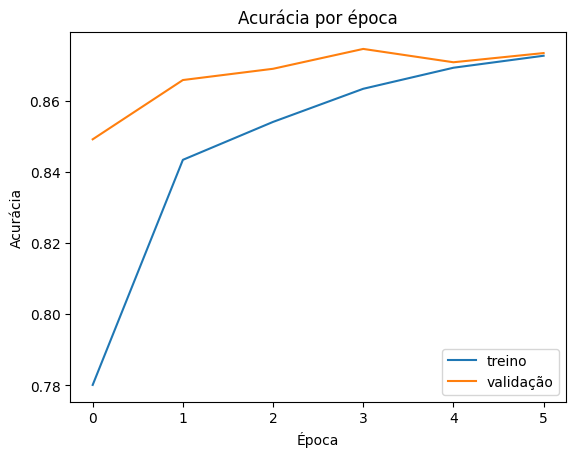

In [ ]:
#Avaliando o gráfico de acurácia de avaliação e de treino

plt.plot(histórico.history["accuracy"])
plt.plot(histórico.history["val_accuracy"])
plt.title("Acurácia por época")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend(['treino','validação'])

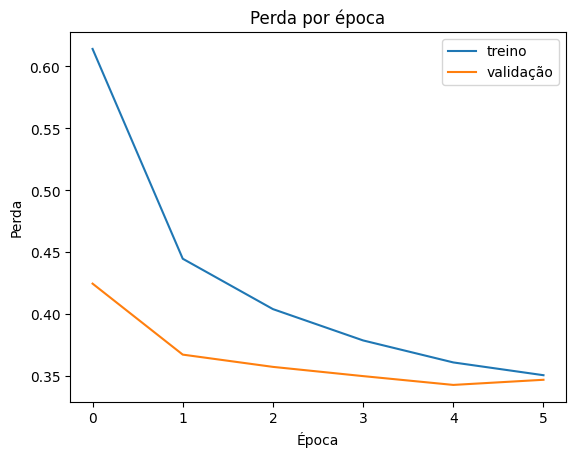

In [ ]:
#Avaliando o gráfico de perda de avaliação e de treino

plt.plot(histórico.history["loss"])
plt.plot(histórico.history["val_loss"])
plt.title("Perda por época")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend(['treino','validação'])

In [ ]:
# Validando dados de teste
modelo.evaluate(x_test,y_test) #  Nos resultados é retornado uma lista contendo o valor de perda e a acurácia

313/313 [==============================] - 1s 3ms/step - loss: 41.1639 - accuracy: 0.8597


[41.163909912109375, 0.8597000241279602]